In [84]:
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv('houseprice.csv',usecols=['SalePrice','MSSubClass','MSZoning','LotFrontage','Street','YearBuilt','LotArea','LotShape','1stFlrSF','2ndFlrSF']).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [86]:
df.shape

(1201, 10)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [88]:
# find distinct values for each columns
for i in df.columns:
    print('Column name {} and unique values are {}'.format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [89]:
import datetime
datetime.datetime.now().year

2024

In [90]:
# Calculate how many years ago the house was built
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']

In [91]:
df.drop('YearBuilt',axis=1,inplace=True)

In [92]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [93]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,24


In [94]:
# Creating Categorical features
cat_features = ['MSSubClass','MSZoning','Street','LotShape']
out_features = 'SalePrice'

In [95]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [96]:
# Encoding for each unique value of column MSSubClass
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders['MSSubClass'] = LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0])

In [97]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

Labeling all categorical features using LabelEncoder

In [98]:
# LabelEncoding for each categorical feature
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [99]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [100]:
# Stacking and Converting into Tensors
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [101]:
# Convert numpy to Tensors
import torch
cat_features = torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [102]:
# Create continuous variable
cont_features = []
for i in df.columns:
  if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'SalePrice']:
    pass
  else:
    cont_features.append(i)

In [103]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [104]:
# Stacking continuous variable to a tensor
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [105]:
cont_values.dtype

torch.float32

In [106]:
# Dependent Feature -> SalePrice
y = torch.tensor(df['SalePrice'].values, dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [108]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

Embedding Size for Categorical columns

In [109]:
# Check how many unique values in all the categorical columns
cat_dims = [len(df[col].unique()) for col in ['MSSubClass', 'MSZoning', 'Street', 'LotShape']]
cat_dims

[15, 5, 2, 4]

In [110]:
# Thumbs rule : Output dimension should be setbased on the input dimension(min(50,feature dimension//2))
embedding_dim = [(x, min(50, (x+1) // 2)) for x in cat_dims]

In [111]:
# Preprocessing Steps
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [113]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [114]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [115]:
# Converting the categorical features into vectors
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))

In [116]:
embedding_val

[tensor([[ 0.2970,  0.6523,  1.2657,  ..., -0.3858, -0.0302, -0.0387],
         [ 2.1411,  1.1901,  0.1090,  ...,  0.5748,  1.3716, -1.7164],
         [ 0.2970,  0.6523,  1.2657,  ..., -0.3858, -0.0302, -0.0387],
         ...,
         [-0.2937, -0.3787, -1.7879,  ..., -0.0512,  0.5684, -1.3255],
         [ 2.1411,  1.1901,  0.1090,  ...,  0.5748,  1.3716, -1.7164],
         [ 2.1411,  1.1901,  0.1090,  ...,  0.5748,  1.3716, -1.7164]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2575, -0.0243,  0.9427],
         [ 0.2575, -0.0243,  0.9427],
         [ 0.2575, -0.0243,  0.9427],
         ...,
         [ 0.2575, -0.0243,  0.9427],
         [ 0.2575, -0.0243,  0.9427],
         [ 0.2575, -0.0243,  0.9427]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.6839],
         [-1.6839],
         [-1.6839],
         ...,
         [-1.6839],
         [-1.6839],
         [-1.6839]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7427,  0.3859],
         [-0.7427,  0.3859],
         [-0.1306, -0.

In [117]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.2970,  0.6523,  1.2657,  ..., -1.6839, -0.7427,  0.3859],
        [ 2.1411,  1.1901,  0.1090,  ..., -1.6839, -0.7427,  0.3859],
        [ 0.2970,  0.6523,  1.2657,  ..., -1.6839, -0.1306, -0.3014],
        ...,
        [-0.2937, -0.3787, -1.7879,  ..., -1.6839, -0.7427,  0.3859],
        [ 2.1411,  1.1901,  0.1090,  ..., -1.6839, -0.7427,  0.3859],
        [ 2.1411,  1.1901,  0.1090,  ..., -1.6839, -0.7427,  0.3859]],
       grad_fn=<CatBackward0>)

In [118]:
# Implement dropupout
droput = nn.Dropout(.4)

In [119]:
final_embed = droput(z)
final_embed

tensor([[ 0.0000,  1.0871,  0.0000,  ..., -2.8065, -0.0000,  0.6432],
        [ 0.0000,  1.9834,  0.0000,  ..., -0.0000, -0.0000,  0.0000],
        [ 0.4950,  1.0871,  0.0000,  ..., -0.0000, -0.2177, -0.5023],
        ...,
        [-0.4896, -0.6312, -0.0000,  ..., -2.8065, -1.2378,  0.6432],
        [ 3.5685,  0.0000,  0.0000,  ..., -2.8065, -1.2378,  0.6432],
        [ 3.5685,  1.9834,  0.0000,  ..., -2.8065, -0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

In [120]:
# Create a Feed Forward Neural Network
class FeedForwardNN(nn.Module):

  def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)   # Batch Normalization

    layerlist = []
    n_emb = sum((out for inp, out in embedding_dim)) # number of embedding dimensions
    n_in = n_emb + n_cont        # number oof inputs

    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.Dropout(p))
      n_in = i
    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cat, x_cont):
    embeddings = []
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont) # input feature
    x = torch.cat([x, x_cont], 1) # combining continuous and input features
    x = self.layers(x)
    return x

In [121]:
len(cont_features)

5

In [122]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100,50], p=0.4)
# dropping 40% of neural networks in each forward feed to prevent dependency and overfitting

In [123]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=50, out_features=1, bias=True)
  )
)

Define Loss And Optimizer

In [124]:
loss_function = nn.MSELoss() # Later convert to RMSE
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [125]:
df.shape

(1201, 10)

In [126]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [127]:
cont_values.shape

torch.Size([1201, 5])

In [128]:
1200 * 0.15

180.0

In [129]:
# Train Test Split
batch_size = 1200
test_size = int(batch_size*0.15) # 15% of the batch size is used for test
train_categorical = cat_features[: batch_size - test_size]
test_categorical = cat_features[batch_size - test_size : batch_size]
train_cont = cont_values[: batch_size - test_size]
test_cont = cont_values[batch_size - test_size : batch_size]
y_train = y[: batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [130]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [131]:
epochs = 5000
final_losses = []
for i in range(epochs):
  i += 1
  y_pred = model(train_categorical, train_cont)
  loss = torch.sqrt(loss_function(y_pred, y_train)) # RMSE
  final_losses.append(loss)
  if i%10 == 1:
    print("Epoch number : {} and the loss : {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()       # backpropagation
  optimizer.step()

Epoch number : 1 and the loss : 200496.875
Epoch number : 11 and the loss : 200473.546875
Epoch number : 21 and the loss : 200311.34375
Epoch number : 31 and the loss : 199630.171875
Epoch number : 41 and the loss : 197435.921875
Epoch number : 51 and the loss : 191806.125
Epoch number : 61 and the loss : 179462.453125
Epoch number : 71 and the loss : 156215.484375
Epoch number : 81 and the loss : 118017.9765625
Epoch number : 91 and the loss : 79689.3046875
Epoch number : 101 and the loss : 79104.21875
Epoch number : 111 and the loss : 71238.8515625
Epoch number : 121 and the loss : 69830.7734375
Epoch number : 131 and the loss : 69357.5390625
Epoch number : 141 and the loss : 64545.828125
Epoch number : 151 and the loss : 63031.9140625
Epoch number : 161 and the loss : 62123.2578125
Epoch number : 171 and the loss : 62128.3515625
Epoch number : 181 and the loss : 63090.0703125
Epoch number : 191 and the loss : 63431.03515625
Epoch number : 201 and the loss : 63246.2578125
Epoch numbe

In [132]:
# Detach and convert to numpy array
final_losses = [loss.detach().numpy() for loss in final_losses]

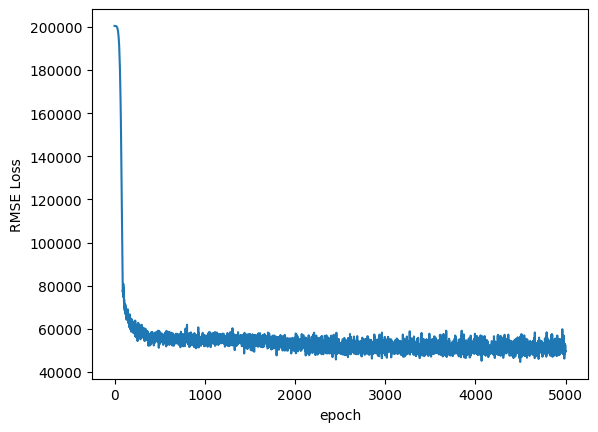

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [134]:
## Validate the Test Data
y_pred = ''
with torch.no_grad():
  y_pred = model(test_categorical, test_cont)
  loss = torch.sqrt(loss_function(y_pred,y_test))
print('RMSE : {}'.format(loss))

RMSE : 68908.8359375


In [135]:
data_verify = pd.DataFrame(y_test.tolist(), columns=['Test'])

In [136]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns=['Prediction'])

In [137]:
data_predicted

,Prediction
0,125690.328125
1,197415.500000
2,153602.609375
3,222762.656250
4,177555.781250
5,224488.843750
6,120610.648438
7,276501.500000
8,129386.679688
9,242552.750000


In [138]:
final_output = pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference'] = final_output['Test'] - final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,125690.328125,4309.671875
1,138887.0,197415.500000,-58528.500000
2,175500.0,153602.609375,21897.390625
3,195000.0,222762.656250,-27762.656250
4,142500.0,177555.781250,-35055.781250


In [139]:
# Saving the model
torch.save(model, 'HousePrice.pt')

In [140]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [141]:
# Loading the saved model
embs_size = [(15,8), (5,3), (2,1), (4,2)]
model1 = FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [142]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [143]:
model.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=50, out_features=1, bias=True)
  )
)